# Campionamento di distribuzioni usando l'algoritmo di Metropolis#

Obiettivo di questa lezione è usare l'algoritmo di Metropolis per campionare distribuzioni di probabilità, in particolare quelle ottenute come modulo quadro di autofunzioni dell'atomo di idrogeno.

In particolare, l'autofunzione del ground state dell'atomo di idrogeno sarà:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-\frac{r}{a_0}} 
$$
L'autofunzione di uno dei $2p$ sarà invece:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-\frac{r}{2a_0}} \cos(\theta)
$$
I valori medi del raggio per queste due distribuzioni saranno:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Nel seguito utilizzo per tutti i risultati il sistema di unità di misura in cui il raggio di Bohr e' posto uguale a 1 in modo da semplificare la rappresentazione (ho così a che fare con valori di ordine 1).



## Calcolo del raggio medio 
Ho usato l'algoritmo di Metropolis con 10.000 punti suddivisi in 100 blocchi. E' da osservare che quando si usi il metodo Metropolis per il campionamento di una distribuzione è indispensabile usare il metodo dei blocchi per la stima delle incertezze. Infatti, successive valutazioni sono correlate, come si analizzerà in una lezione successiva, e quindi non è possibile sfruttare metodi come la deviazione standard sulla media, che richiedono come ipotesi di avere misure non correlate.

Nei grafici sottostanti riporto i risultati del calcolo del raggio medio sugli orbitali $1s$ e $2p$ dell'atomo di idrogeno, calcolati usando la formula:
$$
\left\langle r \right\rangle_{\Psi_{n,l,m}} = \int_\Omega |\Psi_{n,l,m}(\vec{x})|^2 r(\vec{x}) d^3 \vec{x}
$$
dove $\Omega$ è un opportuno dominio di integrazione, teoricamente tutto lo spazio. Quindi si campiona con l'algoritmo Metropolis la distribuzione di probabilità data dal modulo quadro della funzione d'onda $\Psi_{n,l,m} (\vec{x})$ e si sfruttano i numeri ottenuti, distribuiti secondo tale legge, per il calcolo di un integrale Montecarlo.

Nel seguito riporto sia i risultati calcolati tramite un algoritmo Metropolis a proposta di mossa di transizione uniforme che con proposta di mossa gaussiana (solo nel caso dell'orbitale $1s$)

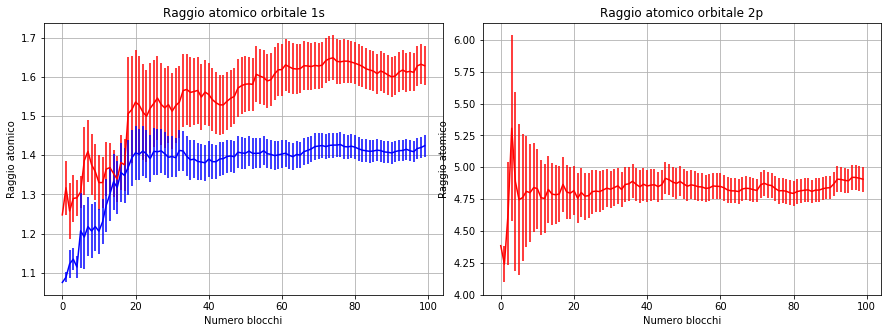

In [12]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 5))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.1)

plt.subplot(1,2,1)
x, f, error = np.loadtxt("./Esercizio5.01a/data.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Raggio atomico')
plt.title("Raggio atomico orbitale 1s")
x, f, error = np.loadtxt("./Esercizio5.01c/data.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error,color='b')
plt.grid()

plt.subplot(1,2,2)
x, f, error = np.loadtxt("./Esercizio5.01b/data.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Raggio atomico')
plt.grid()
plt.title("Raggio atomico orbitale 2p")


plt.show()

Il valore ottenuto in tutti i casi è compatibile con il risultato atteso entro un paio di deviazioni standard. Osservo che con una mossa di transizione gaussiana la convergenza risulta leggermente più veloce, con degli errori circa dimezzati rispetto alla proposta di mossa uniforme.

Per comprendere meglio come funziona il Metropolis, mostro di seguito i diagrammi della distribuzione dei punti ottenuti durante il campionamento. Tali diagrammi riproducono di fatto la struttura sferica di un orbitale $s$ e quella bilobata di un orbitale $p$.

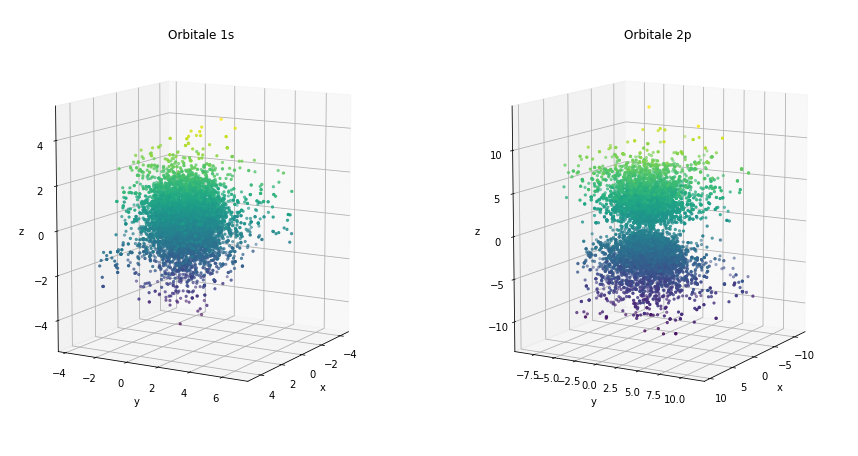

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(15, 8))                     #sx: larghezza; dx: Lunghezza

X,Y,Z = np.loadtxt("./Esercizio5.01a/positions.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Orbitale 1s')
ax1.view_init(10, 30)

X,Y,Z = np.loadtxt("./Esercizio5.01b/positions.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X, Y, Z, c=Z, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)
ax2.set_title('Orbitale 2p')

plt.show() 
